Submitted by Brian Camp

# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

**Note:** changed the `json.load()` command to be executed inside `with ... as ...` environment.

In [6]:
# load json as string
with open('data/world_bank_projects_less.json') as jsonfilename:
    smalldata = json.load(jsonfilename)
    
print(type(smalldata))
print(type(smalldata[0]))
smalldata[0]

<class 'list'>
<class 'dict'>


{'_id': {'$oid': '52b213b38594d8a2be17c780'},
 'approvalfy': 1999,
 'board_approval_month': 'November',
 'boardapprovaldate': '2013-11-12T00:00:00Z',
 'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
 'closingdate': '2018-07-07T00:00:00Z',
 'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
 'countrycode': 'ET',
 'countryname': 'Federal Democratic Republic of Ethiopia',
 'countryshortname': 'Ethiopia',
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'envassesmentcategorycode': 'C',
 'grantamt': 0,
 'ibrdcommamt': 0,
 'id': 'P129828',
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'lendinginstr': 'Investment Project Financing',
 'lendinginstrtype': 'IN',
 'lendprojectcost': 550000000,
 'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
  {'Name': 'Education', 'Percent': 26},
  {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
  {'Name': 'Education', 'Percent': 12}],
 'm

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Loading data.

First we load the data into a data file `mydata`. Here the function `json.load()` is used.

In [8]:
with open('data/world_bank_projects.json') as json_file:
    mydata = json.load(json_file)
    
print(type(mydata))
print(type(mydata[0]))
mydata[0] # this allows us to see what what of the rows from mydata looks like

<class 'list'>
<class 'dict'>


{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

We can see that the data has loaded as list of dictionaries. Below we have printed out the keys of the dictionary and identified a few of the keys of interest. When we transfer `mydata` into a pandas DataFrame, these will become the fields that will be investigated.

In [9]:
mydata[0].keys()  # different fields

dict_keys(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline', 'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode', 'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty', 'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt', 'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4', 'prodlinetext', 'productlinetype', 'regionname', 'status', 'country_namecode', 'envassesmentcategorycode', 'project_abstract', 'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype', 'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3', 'majorsector_percent', 'board_approval_month', 'theme_namecode', 'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode', '_id'])

Some keys of interest:
<br>`regionname`, `countryshortname`, `mjtheme_namecode`, `mjtheme`, `totalamt`, `grantamt`, `totalcommamt`

The two primary fields that will be investigated are `countryshortname` and `mjtheme_namecode`. The others are of secondary interest.

Below we take a look at the values that go along with these keys in the first row of `mydata`.

In [10]:
mydata[0]['regionname'] # region for the first row

'Africa'

In [11]:
mydata[0]['countryshortname'] # country of first row

'Ethiopia'

In [12]:
mydata[0]['mjtheme_namecode'] # mjtheme_namecode of first row

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [13]:
mydata[0]['mjtheme'] # mjtheme of first row

['Human development']

Based upon what we see from `mydata[0]['mytheme_namecode']`, we see that one of the values in the first row is actually a list of dicts. This will be the focus of parts 2 and 3 of this project.

## Creating a DataFrame

Here the function `json_nomralize()` is used to create a DataFrame from the loaded json file.

In [14]:
my_df = json_normalize(mydata)
print(my_df.shape) # number of rows and columns in DataFrame
print(my_df.columns) # names of the columns - should correspond to the keys of mydata
my_df.head(5)

(500, 55)
Index(['_id.$oid', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract.cdata', 'project_name',
       'projectdocs', 'projectfinancialtype', 'projectstatusdisplay',
       'regionname', 'sector', 'sector1.Name', 'sector1.Percent',
       'sector2.Name', 'sector2.Percent', 'sector3.Name', 'sector3.Percent',
       'sector4.Name', 'sector4.Percent', 'sector_namecode', 'sectorcode',
       'source', 'status', 'supplementprojectflg', 'theme1.Name',
       'theme1.Percent', 'theme_namecode', 'themecode', 'totalamt',
       'total

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,Participation and civic engagement,50,"[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,52b213b38594d8a2be17c784,2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,Export development and competitiveness,30,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


## #1. Countries with most projects.

If each row corresponds to a project in a country to be counted then it is relatively simply to count how many projects per country and show the top 10.

In [15]:
my_df.countryshortname.value_counts().head(10)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

We can also do more than this by making use of the pandas DataFrame method `.groupby()`. Using `.groupby()` allows for additional information to be tracked at the same time. For example, below we will construct a DataFrame that has the country names as the indexes. The columns will include how many projects per country and then the columns `grantamt`, `totalamt`, `totalcommamt` and `total` for how much in funds were awarded to each contry for their projects.

Notes: 
<ul><li><i>totalcommamt</i> and <i>total</i> are actually the same values since <i>grantamt</i>+<i>totalamt</i>=<i>totalcommamt</i> which is how <i>total</i> is defined.
    <li> Dollar values have been converted to millions of dollars for easier reading.

First, a DataFrame `country_by_regions` is created that identifies in which region each country is located.

In [16]:
country_by_regions = my_df[['countryshortname', 'regionname']].drop_duplicates().set_index('countryshortname')
print(country_by_regions.shape)
country_by_regions.head(10)

(118, 1)


,regionname
countryshortname,
Ethiopia,Africa
Tunisia,Middle East and North Africa
Tuvalu,East Asia and Pacific
"Yemen, Republic of",Middle East and North Africa
Lesotho,Africa
Kenya,Africa
India,South Asia
China,East Asia and Pacific
Morocco,Middle East and North Africa


Next, two DataFrames are created, `countries` and `country_count`, and then combined using `pd.concat()`. The result is one DataFrame `countries` that will show the countries in order of how many projects each was awarded as well as the financial amounts they were awarded. Finally, `country_by_regions` is added as the so that it can be more easily seen in which regions the top 10 awarded countries reside.

In [17]:
# countries = dataframe of country and grant amounts
countries = my_df.groupby('countryshortname')[['countrycode','grantamt','totalamt','totalcommamt']]

# country_count = dataframe to count number of projects per country
# this separate data frame was created to make sorting slight easier
country_count = my_df.groupby('countryshortname')[['countrycode']].count().sort_values(
    by = 'countrycode', ascending=False)
country_count.columns=['number']
print(country_count.head(10))

# dollar values changed to millions of dollars
countries = countries.aggregate(lambda x: round(np.sum(x)/1e6,1))
print(countries.columns)

# total column created
countries['total'] = countries.grantamt + countries.totalamt

print(countries.head(10))

# combining country counts with the award values
countries = pd.concat([country_count, countries],axis='columns',sort=False).sort_values(by='number',ascending=False)

# adding the region column
countries['region'] = country_by_regions

countries.head(10)

                    number
countryshortname          
China                   19
Indonesia               19
Vietnam                 17
India                   16
Yemen, Republic of      13
Nepal                   12
Bangladesh              12
Morocco                 12
Mozambique              11
Africa                  11
Index(['grantamt', 'totalamt', 'totalcommamt'], dtype='object')
                     grantamt  totalamt  totalcommamt   total
countryshortname                                             
Afghanistan             174.7     217.5         392.2   392.2
Africa                   31.9     987.9        1019.8  1019.8
Albania                   4.7      40.0          44.7    44.7
Angola                    0.0      75.0          75.0    75.0
Antigua and Barbuda       0.0      10.0          10.0    10.0
Argentina                 5.9       0.0           5.9     5.9
Armenia                   4.2     110.0         114.2   114.2
Azerbaijan                0.2     301.6         301.8 

,number,grantamt,totalamt,totalcommamt,total,region
China,19,426.8,1540.0,1966.8,1966.8,East Asia and Pacific
Indonesia,19,49.2,2045.5,2094.7,2094.7,East Asia and Pacific
Vietnam,17,118.2,1832.4,1950.6,1950.6,East Asia and Pacific
India,16,8.0,2595.7,2603.7,2603.7,South Asia
"Yemen, Republic of",13,27.0,256.0,283.0,283.0,Middle East and North Africa
Nepal,12,87.2,316.3,403.4,403.5,South Asia
Bangladesh,12,65.7,1566.5,1632.2,1632.2,South Asia
Morocco,12,91.2,793.2,884.4,884.4,Middle East and North Africa
Mozambique,11,15.4,657.0,672.4,672.4,Africa
Africa,11,31.9,987.9,1019.8,1019.8,Africa


Here is a quick comparison of the top number of projects by region.

In [18]:
my_df.regionname.value_counts()

Africa                          152
East Asia and Pacific           100
Europe and Central Asia          74
South Asia                       65
Middle East and North Africa     54
Latin America and Caribbean      53
Other                             2
Name: regionname, dtype: int64

From these two tables we can see that the top 3 awarded countries (by number of projects) were in the East Asia and Pacific region. The top 10 countries from four different regions. Interestingly, only two contries from Africa are listed in the top 10 even though Africa as a region had far more projects than the other regions. Similarly, even though Europe and Central Asia as a region received the third most number of awards, there were no countries from that region in the top 10 by number of projects awarded.

Here is a bar plot of the countries with the most number of projects. Below it is a bar plot of these ten countries and their total cost of their projects.

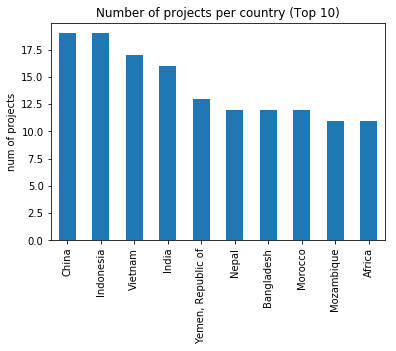

In [19]:
countries.number.head(10).plot(kind='bar')
plt.ylabel('num of projects')
plt.title('Number of projects per country (Top 10)')
plt.show()

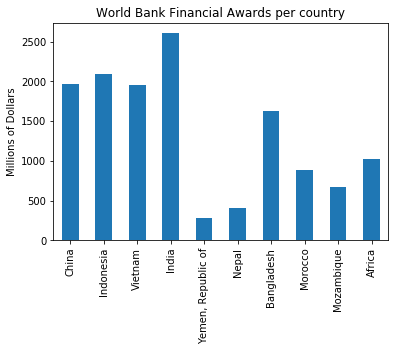

In [20]:
countries.total.head(10).plot(kind='bar')
plt.ylabel('Millions of Dollars')
plt.title('World Bank Financial Awards per country')
plt.show()

It is also interesting to look at the awards made by region and how many occured. The analysis is below but this time using `.groupby()` with `'regionname'`.

In [21]:
# regions = dataframe of regions and grant amounts
regions = my_df.groupby('regionname')[['countrycode','grantamt','totalamt','totalcommamt']]

# country_count = dataframe to count number of projects per region
# this separate data frame was created to make sorting slight easier
region_count = my_df.groupby('regionname')[['countrycode']].count().sort_values(
    by = 'countrycode', ascending=False)
region_count.columns=['number']

# dollar values changed to millions of dollars
regions = regions.aggregate(lambda x: round(np.sum(x)/1e6,1))

# total column created
regions['total'] = regions.grantamt + regions.totalamt

# combining region counts with the award values
regions = pd.concat([region_count, regions],axis='columns',sort=False).sort_values(by='number',ascending=False)
regions

,number,grantamt,totalamt,totalcommamt,total
Africa,152,613.6,8778.4,9392.0,9392.0
East Asia and Pacific,100,700.0,6652.7,7352.8,7352.7
Europe and Central Asia,74,125.5,5402.2,5527.6,5527.7
South Asia,65,396.0,5794.0,6190.0,6190.0
Middle East and North Africa,54,286.8,2434.0,2720.8,2720.8
Latin America and Caribbean,53,88.1,5079.5,5167.6,5167.6
Other,2,6.1,0.0,6.1,6.1


Here are some pie charts showing the relative breakdowns of number projects by region and the total dollar amounts per region.

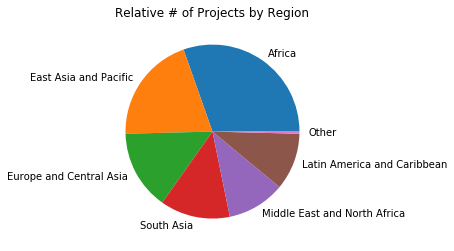

In [22]:
regions.number.plot(kind='pie')
plt.ylabel(None)
plt.title('Relative # of Projects by Region')
plt.show()

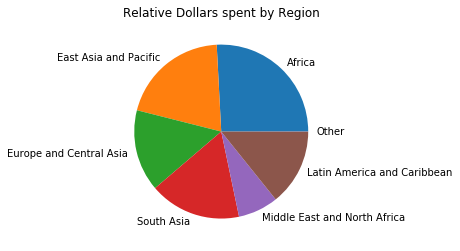

In [23]:
regions.total.plot(kind='pie')
plt.ylabel(None)
plt.title('Relative Dollars spent by Region')
plt.show()

## #2 and #3. Counting the top mjtheme_namecode entries and filling in empty names

Now that the data is unwrapped into the dataframe `my_df`, we can easily count the top 10 most entries in the `mjtheme_namecode` column.

In [24]:
my_df.mjtheme_namecode.value_counts().head(10)

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                                                                12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                                                                                        11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                                                                                         8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                                                                                           6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector gov

Unfortunately, it appears that each row contains multiple codes, for example in the 1st row, there are two projects.

Perhaps this is indicating that each project is actually composed of sub projects.

The above `.value_counts()` has shown us that there were 12 projects that each had two codes 11: 'Environment and natural resources management'. There were also 11 grants that had each had codes 8: 'Human Development' and code 11: '' (i.e. where the name is not specified).

For example, looking at `mjtheme_namecode` in the first row we can see that it is part of the latter group (one code 8 and one code 11 but without a label).

In [25]:
for each in my_df.mjtheme_namecode[0]:
    print(each)

{'code': '8', 'name': 'Human development'}
{'code': '11', 'name': ''}


It would appear then that there are multiple projects for each row and futher unwrapping is needed.

Since `mjtheme_namecode` is nested in this way (each entry is a list of dicts), we unwrap it again from `mydata` using `json_normalize`. In this format it is a bit easier to see that some of the codes do not have names attached to them.

In [26]:
themes=json_normalize(mydata,'mjtheme_namecode','countryshortname')
themes.head(20)

,code,name,countryshortname
0,8,Human development,Ethiopia
1,11,,Ethiopia
2,1,Economic management,Tunisia
3,6,Social protection and risk management,Tunisia
4,5,Trade and integration,Tuvalu
5,2,Public sector governance,Tuvalu
6,11,Environment and natural resources management,Tuvalu
7,6,Social protection and risk management,Tuvalu
8,7,Social dev/gender/inclusion,"Yemen, Republic of"
9,7,Social dev/gender/inclusion,"Yemen, Republic of"


If each row is considered to be a grant then `mjtheme_namecode` is a dict containing *major* projects contained in each grant. How many major projects are there per grant? And what then is the total?

In [27]:
themes_per_project = my_df.mjtheme_namecode.apply(len).value_counts()

print(themes_per_project)

theme_sum = len(themes.name)
print('Number of themes/projects = %s'%theme_sum)

2    228
4     97
3     92
5     74
1      9
Name: mjtheme_namecode, dtype: int64
Number of themes/projects = 1499


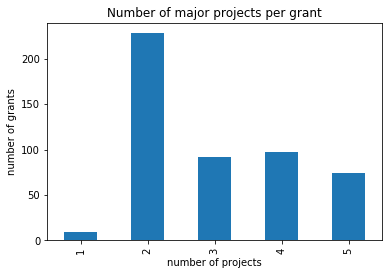

In [28]:
my_df.mjtheme_namecode.apply(len).value_counts().sort_index().plot(kind='bar')
plt.xlabel('number of projects')
plt.ylabel('number of grants')
plt.title('Number of major projects per grant')
plt.show()

There appear to be mainly two themes per grant. Overall there are 1499 themes to consider. The top 10 themes based upon this list is now a bit more easily found although we will still have to fill in the missing blank entries.

In [29]:
themes.name.value_counts()

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64

In this case, there are still 122 themes that need to have their labels filled in.

In order to do so, we build a DataFrame, `codelist`, that contains the codes and thier associated names for projects based upon the other entries.

In [30]:
# group by code and name
codelist = themes.groupby(['name','code'])['countryshortname'].count()

# reset index so that code and name are moved back to columns
codelist = codelist.reset_index()

# delete countryshortname
codelist = codelist.drop('countryshortname', axis=1)

# drop the rows that have length == 0
codelist = codelist.loc[codelist.name.str.len() > 0]

codelist

,name,code
11,Economic management,1
12,Environment and natural resources management,11
13,Financial and private sector development,4
14,Human development,8
15,Public sector governance,2
16,Rule of law,3
17,Rural development,10
18,Social dev/gender/inclusion,7
19,Social protection and risk management,6
20,Trade and integration,5


In [31]:
# now fill back in the empty entries in themes

# first a dictionary mapping codes to names is created from the codelist DataFrame
codemap = dict(zip(codelist.code,codelist.name))
print(codemap)

# next we find the rows to change
rows_to_change = themes.name.str.len()==0
# and change them with .map(codemap) applied
themes.loc[rows_to_change,'name'] = themes.loc[rows_to_change,'code'].map(codemap)

themes.head(20)

{'1': 'Economic management', '11': 'Environment and natural resources management', '4': 'Financial and private sector development', '8': 'Human development', '2': 'Public sector governance', '3': 'Rule of law', '10': 'Rural development', '7': 'Social dev/gender/inclusion', '6': 'Social protection and risk management', '5': 'Trade and integration', '9': 'Urban development'}


,code,name,countryshortname
0,8,Human development,Ethiopia
1,11,Environment and natural resources management,Ethiopia
2,1,Economic management,Tunisia
3,6,Social protection and risk management,Tunisia
4,5,Trade and integration,Tuvalu
5,2,Public sector governance,Tuvalu
6,11,Environment and natural resources management,Tuvalu
7,6,Social protection and risk management,Tuvalu
8,7,Social dev/gender/inclusion,"Yemen, Republic of"
9,7,Social dev/gender/inclusion,"Yemen, Republic of"


Now we can compute the top 10 major project themes.

In [32]:
themes.name.value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64